## 1

In [31]:
import pandas as pd

file_path = 'cardiotocography_data_set.xlsx'  
df = pd.read_excel(file_path)

# Combine NSP labels into two groups: 1 (Normal) and 0 (Abnormal)
df['binary_label'] = df['NSP'].apply(lambda x: 1 if x == 1 else 0)

# Display the first few rows
print(df.head())

# Group 1 features: 'LB', 'ALTV', 'Min', 'Mean'
features = ['LB', 'ALTV', 'Min', 'Mean']
X = df[features]
y = df['binary_label']

       FileName       Date      SegFile    b     e  LBE   LB  AC  FM  UC  ...  \
0  Variab10.txt 1996-12-01  CTG0001.txt  240   357  120  120   0   0   0  ...   
1    Fmcs_1.txt 1996-05-03  CTG0002.txt    5   632  132  132   4   0   4  ...   
2    Fmcs_1.txt 1996-05-03  CTG0003.txt  177   779  133  133   2   0   5  ...   
3    Fmcs_1.txt 1996-05-03  CTG0004.txt  411  1192  134  134   2   0   6  ...   
4    Fmcs_1.txt 1996-05-03  CTG0005.txt  533  1147  132  132   4   0   5  ...   

   D  E  AD  DE  LD  FS  SUSP  CLASS  NSP  binary_label  
0  0  0   0   0   0   1     0      9    2             0  
1  0  0   1   0   0   0     0      6    1             1  
2  0  0   1   0   0   0     0      6    1             1  
3  0  0   1   0   0   0     0      6    1             1  
4  0  0   0   0   0   0     0      2    1             1  

[5 rows x 41 columns]


## 2

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the dataset 50/50 for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")

# Compute confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(f"Naive Bayes Confusion Matrix:\n{conf_matrix_nb}")


Naive Bayes Accuracy: 0.839134524929445
Naive Bayes Confusion Matrix:
[[135  99]
 [ 72 757]]


## 3

In [38]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Classifier
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")

# Compute confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(f"Logistic Regression Confusion Matrix:\n{conf_matrix_lr}")


Logistic Regression Accuracy: 0.8645343367826905
Logistic Regression Confusion Matrix:
[[141  93]
 [ 51 778]]


## 4

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Compute confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(f"Decision Tree Confusion Matrix:\n{conf_matrix_dt}")

Decision Tree Accuracy: 0.8513640639698965
Decision Tree Confusion Matrix:
[[160  74]
 [ 84 745]]


## 5

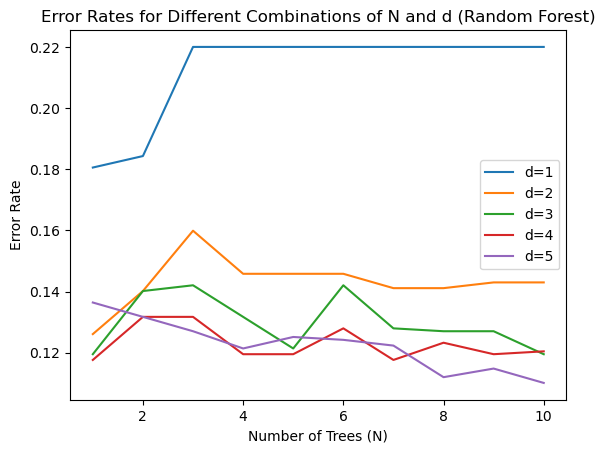

Best combination: N=10, d=5
Accuracy for best combination: 0.889934148635936
Confusion Matrix for best combination:
[[156  78]
 [ 39 790]]


In [50]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are already defined from the previous steps
# Split the dataset 50/50 for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Set values for N (number of trees) and d (maximum depth)
n_values = range(1, 11)  # N = 1 to 10
d_values = range(1, 6)   # d = 1 to 5

error_rates = []
best_accuracy = 0
best_n, best_d = 0, 0
best_conf_matrix = None

# Loop over all combinations of N and d
for n in n_values:
    for d in d_values:
        # Create and train the Random Forest Classifier
        rf_model = RandomForestClassifier(n_estimators=n, max_depth=d, criterion='entropy', random_state=42)
        rf_model.fit(X_train, y_train)
        y_pred_rf = rf_model.predict(X_test)
        
        # Calculate error rate
        accuracy_rf = accuracy_score(y_test, y_pred_rf)
        error_rate = 1 - accuracy_rf
        error_rates.append((n, d, error_rate))
        
        # Track the best combination of N and d
        if accuracy_rf > best_accuracy:
            best_accuracy = accuracy_rf
            best_n, best_d = n, d
            best_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot the error rates
error_rates_array = np.array(error_rates)
fig, ax = plt.subplots()
for d in d_values:
    indices = error_rates_array[:, 1] == d
    ax.plot(error_rates_array[indices, 0], error_rates_array[indices, 2], label=f'd={d}')
ax.set_xlabel('Number of Trees (N)')
ax.set_ylabel('Error Rate')
ax.set_title('Error Rates for Different Combinations of N and d (Random Forest)')
ax.legend()
plt.show()

# Print best combination of N and d and the corresponding accuracy and confusion matrix
print(f"Best combination: N={best_n}, d={best_d}")
print(f"Accuracy for best combination: {best_accuracy}")
print(f"Confusion Matrix for best combination:\n{best_conf_matrix}")


## 6

In [53]:
from sklearn.svm import SVC

# SVM with linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)
accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
conf_matrix_svm_linear = confusion_matrix(y_test, y_pred_svm_linear)
print(f"SVM (Linear) Accuracy: {accuracy_svm_linear}")
print(f"SVM (Linear) Confusion Matrix:\n{conf_matrix_svm_linear}")

# SVM with polynomial kernel (degree 2)
svm_poly = SVC(kernel='poly', degree=2, random_state=42)
svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)
accuracy_svm_poly = accuracy_score(y_test, y_pred_svm_poly)
conf_matrix_svm_poly = confusion_matrix(y_test, y_pred_svm_poly)
print(f"SVM (Degree 2 Polynomial) Accuracy: {accuracy_svm_poly}")
print(f"SVM (Degree 2 Polynomial) Confusion Matrix:\n{conf_matrix_svm_poly}")

# SVM with RBF (Gaussian) kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
conf_matrix_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)
print(f"SVM (Gaussian RBF) Accuracy: {accuracy_svm_rbf}")
print(f"SVM (Gaussian RBF) Confusion Matrix:\n{conf_matrix_svm_rbf}")


SVM (Linear) Accuracy: 0.863593603010348
SVM (Linear) Confusion Matrix:
[[140  94]
 [ 51 778]]
SVM (Degree 2 Polynomial) Accuracy: 0.8541862652869238
SVM (Degree 2 Polynomial) Confusion Matrix:
[[136  98]
 [ 57 772]]
SVM (Gaussian RBF) Accuracy: 0.8654750705550329
SVM (Gaussian RBF) Confusion Matrix:
[[139  95]
 [ 48 781]]


## 7

In [59]:
import pandas as pd

# Prepare summary table
summary_data = [
    ('Naive Bayes', accuracy_nb, conf_matrix_nb),
    ('Logistic Regression', accuracy_lr, conf_matrix_lr),
    ('Decision Tree', accuracy_dt, conf_matrix_dt),
    (f'Random Forest (N={best_n}, d={best_d})', best_accuracy_rf, best_conf_matrix_rf),
    ('SVM (Linear)', accuracy_svm_linear, conf_matrix_svm_linear),
    ('SVM (Degree 2 Poly)', accuracy_svm_poly, conf_matrix_svm_poly),
    ('SVM (Gaussian RBF)', accuracy_svm_rbf, conf_matrix_svm_rbf),
]

summary_df = pd.DataFrame([
    {
        'Model': model,
        'Accuracy': acc,
        'TP': cm[1, 1],
        'FP': cm[0, 1],
        'TN': cm[0, 0],
        'FN': cm[1, 0],
        'TPR': cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) > 0 else 0,
        'TNR': cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0,
    }
    for model, acc, cm in summary_data
])

# Display the summary table
print(summary_df)

                       Model  Accuracy   TP  FP   TN  FN       TPR       TNR
0                Naive Bayes  0.839135  757  99  135  72  0.913148  0.576923
1        Logistic Regression  0.864534  778  93  141  51  0.938480  0.602564
2              Decision Tree  0.851364  745  74  160  84  0.898673  0.683761
3  Random Forest (N=10, d=5)  0.885230  788  81  153  41  0.950543  0.653846
4               SVM (Linear)  0.863594  778  94  140  51  0.938480  0.598291
5        SVM (Degree 2 Poly)  0.854186  772  98  136  57  0.931242  0.581197
6         SVM (Gaussian RBF)  0.865475  781  95  139  48  0.942099  0.594017


## 8

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


  Feature  Importance
3    Mean    0.314321
1    ALTV    0.294477
2     Min    0.219837
0      LB    0.171366


**Feature Importance from Tree-based Models**


Random Forests and Decision Trees inherently calculate feature importance as part of the training process.

You can access the feature importance values using the .feature_importances_ attribute after fitting the model.